In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
austin_df = pd.read_csv('austin_311_service_requests.csv')
#austin_df.head()

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [4]:
# austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
#                                       "created_date":"Date", "owning_department":"Department",
#                                       "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
# austin_df.head(10)

In [5]:
austin_df.replace('', np.nan, inplace=True)
#austin_df.head()

In [6]:
#austin_df.count()

In [7]:
cleanaustin_df = austin_df.dropna(how="any")
#cleanaustin_df.count()

In [8]:
#cleanaustin_df.head()

In [9]:
#cleanaustin_df['city'].value_counts()

In [10]:
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.city.isin(value_list)]

In [11]:
# austincity_df['City'].value_counts()

In [12]:
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.county.isin(value_list)]

In [13]:
# austin311_df["incident_zip"] = austin311_df["incident_zip"].astype(str)
# austin311_df['incident_zip'] = austin311_df['incident_zip'].str.replace('.0', ' ')

In [14]:
austin311_df["incident_zip"] = austin311_df["incident_zip"].astype(int)

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
austin311_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [16]:
austin311_df['month'] = austin311_df['created_date'].str.extract('(-..-)', expand=True)
austin311_df['year'] = austin311_df['created_date'].str.extract('(....-)', expand=True)

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#austin311_df.head()

In [18]:
austin311_df['month'] = austin311_df['month'].str.lstrip('-').str.rstrip('-')
austin311_df['year'] = austin311_df['year'].str.rstrip('-')


C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
austin311_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,01,2015
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,05,2016
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,01,2014
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,11,2014
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,07,2014


In [20]:
austin311_df['owning_department'].value_counts()


Animal Services Office                          83959
Austin Code Department                          77176
Transportation                                  73168
Austin Resource Recovery                        62244
Public Works                                    42411
Austin Energy Department                        17450
Parks & Recreation Department                   16114
Health & Human Services                         13759
Economic Development Department                 12078
Austin Water Utility                            10619
Watershed Protection                             9021
Public Health                                    3838
Austin Water                                      781
Neighborhood Housing & Community Development      120
Austin Fire Department                             63
Neighborhood Housing & Community                   50
Office of Emergency Management                      1
Name: owning_department, dtype: int64

In [21]:
austin311_df["month"] = austin311_df.month.astype(int)

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


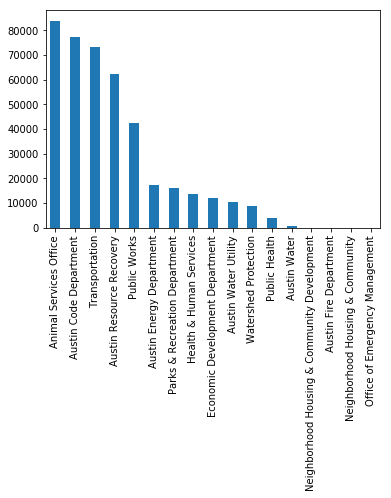

In [22]:
pd.value_counts(austin311_df['owning_department']).plot.bar()
plt.savefig("overviewbydepartment.png")
plt.show()

In [23]:
animal_services = austin311_df[austin311_df['owning_department'].str.contains('Animal Services Office')]
animal_services.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,1,2015
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,5,2016
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,1,2014
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,7,2014
5,AUSTIN,TRAVIS,78702,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER,6,2016


In [24]:
animal_services['complaint_description'].value_counts()

Loose Dog                              27352
Animal Control - Assistance Request    17857
Injured / Sick Animal                  13371
Animal - Proper Care                    4959
Wildlife Exposure                       4601
Animal Bite                             4048
Found Animal - Pick Up                  2811
Found Animal Report - Keep              2628
Dangerous/Vicious Dog Investigation     1674
Loose Animal Not Dog                    1344
Bat Complaint                            963
Coyote Complaints                        749
Animal In Vehicle                        744
Animal Trapped in Storm Drain            371
Loose Animal (not dog)                   336
Animal Roadside Sales                     77
Dangerous Animal - Except Dogs            69
zCoyote Complaints                         3
Dead Bird                                  1
zz - Coyote Compliants                     1
Name: complaint_description, dtype: int64

In [25]:
top_complaints = animal_services.complaint_description.value_counts().reset_index(name="count").query("count > 3000")["index"]
print(top_complaints)

0                              Loose Dog
1    Animal Control - Assistance Request
2                  Injured / Sick Animal
3                   Animal - Proper Care
4                      Wildlife Exposure
5                            Animal Bite
Name: index, dtype: object


In [26]:
animal_services['incident_zip'].nunique()

53

In [28]:
animal_services['incident_zip'].value_counts()

78744    7049
78745    6379
78741    4734
78753    4666
78758    4621
78704    4406
78702    4086
78723    3829
78748    3729
78724    3167
78721    2882
78754    2265
78749    2151
78759    2059
78752    1992
78757    1757
78703    1633
78617    1632
78727    1607
78747    1602
78701    1532
78731    1523
78746    1424
78751    1185
78735     991
78705     950
78756     931
78728     928
78660     914
78725     787
78734     750
78722     728
78739     674
78750     613
78726     570
78732     510
78736     501
78733     400
78730     306
78719     299
78742     231
78653     220
78652     203
78737     166
78738     158
78729      89
78712      74
78641      27
78610      22
78613       4
78620       1
78669       1
78621       1
Name: incident_zip, dtype: int64

In [29]:
animal_services.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78744
1    78745
2    78741
3    78753
4    78758
5    78704
6    78702
7    78723
8    78748
9    78724
Name: index, dtype: int64

In [30]:
# pd.value_counts(animal_services['incident_zip']).plot.bar()
# plt.show()

In [31]:
animal_services['incident_zip'].value_counts()

78744    7049
78745    6379
78741    4734
78753    4666
78758    4621
78704    4406
78702    4086
78723    3829
78748    3729
78724    3167
78721    2882
78754    2265
78749    2151
78759    2059
78752    1992
78757    1757
78703    1633
78617    1632
78727    1607
78747    1602
78701    1532
78731    1523
78746    1424
78751    1185
78735     991
78705     950
78756     931
78728     928
78660     914
78725     787
78734     750
78722     728
78739     674
78750     613
78726     570
78732     510
78736     501
78733     400
78730     306
78719     299
78742     231
78653     220
78652     203
78737     166
78738     158
78729      89
78712      74
78641      27
78610      22
78613       4
78620       1
78669       1
78621       1
Name: incident_zip, dtype: int64

In [33]:
animal_services = austin311_df[austin311_df['owning_department'].str.contains('Animal Services Office')]
animal_services.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,1,2015
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,5,2016
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,1,2014
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,7,2014
5,AUSTIN,TRAVIS,78702,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER,6,2016


In [34]:
# pd.value_counts(animal_services['Incident Zip']).plot.bar()
# plt.show()

In [35]:
code_department = austin311_df[austin311_df['owning_department'].str.contains('Austin Code Department')]
code_department.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,11,2014
6,AUSTIN,TRAVIS,78744,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,8,2015
9,AUSTIN,TRAVIS,78759,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,8,2017
13,AUSTIN,TRAVIS,78701,2016-08-17 11:46:27,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,8,2016
18,AUSTIN,TRAVIS,78705,2016-09-15 13:52:56,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,9,2016


In [36]:
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Austin Code - ", "")
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Code Compliance - ", "")

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
code_department['complaint_description'].value_counts()

Request Code Officer                   71861
Signs/Billboards                        2346
Short Term Rental Complaint SR          1969
Short Term Rental (STR) Appointment      804
Construction Ordinance SR                158
Construction Rest Break Complaint         36
Woodridge Apt                              2
Name: complaint_description, dtype: int64

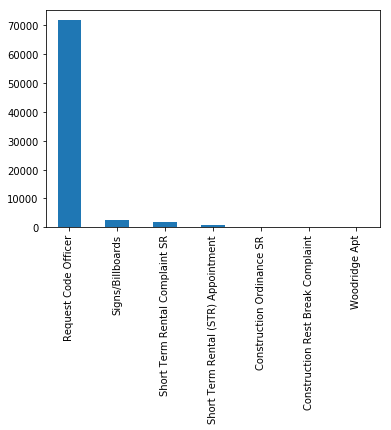

In [38]:
pd.value_counts(code_department['complaint_description']).plot.bar()
plt.savefig("overviewcodedepartment.png")
plt.show()

In [39]:
# code_department['Incident Zip'].value_counts()

In [40]:
# pd.value_counts(code_department['Incident Zip']).plot.bar()
# plt.show()

In [41]:
transportation = austin311_df[austin311_df['owning_department'].str.contains('Transportation')]
transportation.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
14,AUSTIN,TRAVIS,78702,2014-05-15 10:13:41,Transportation,Sign - Traffic Sign Emergency,SIGNTRAF,5,2014
22,AUSTIN,TRAVIS,78742,2014-12-26 10:43:49,Transportation,Traffic Signal - Maintenance,TRASIGMA,12,2014
30,AUSTIN,TRAVIS,78701,2016-03-15 18:08:07,Transportation,Traffic Signal - Maintenance,TRASIGMA,3,2016
33,AUSTIN,TRAVIS,78703,2016-07-17 19:04:00,Transportation,Traffic Signal - Maintenance,TRASIGMA,7,2016
40,AUSTIN,TRAVIS,78751,2014-12-10 13:09:40,Transportation,Traffic Signal - Dig Tess Request,TRAFFI10,12,2014


In [42]:
# transportation['Type of Complaint'].value_counts()

In [43]:
transportation['complaint_description'].value_counts()

Traffic Signal - Maintenance                26073
Traffic Signal - Dig Tess Request            8757
Sign - New                                   4230
Sign - Traffic Sign Maintenance              4169
Sign - Traffic Sign Emergency                3511
Parking Machine Issue                        3095
Concerns in the ROW                          2560
View Obstruction at Intersection             2289
Traffic Signal - New/Change                  2140
Sign - Street Name                           2056
Road Markings/Striping - Maintenance         1788
Sign - Parking Sign Maintenance              1505
Traffic Engineering - General                1379
Traffic Calming                              1261
School Zone Flasher - Timing/Maintenance     1189
Road Markings/Striping - New                 1060
Bicycle Issues                                998
Construction Items- ROW                       938
Lane/Road Closure Notification                909
Construction items in ROW                     863


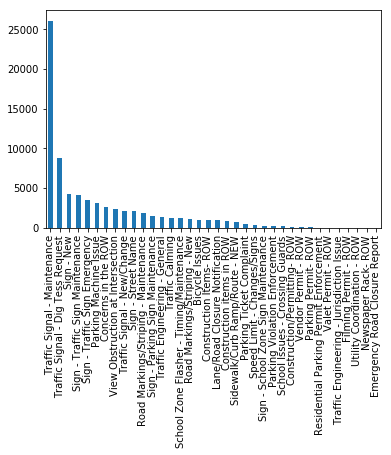

In [44]:
pd.value_counts(transportation['complaint_description']).plot.bar()
plt.savefig("overviewtransportation.png")
plt.show()

In [45]:
# transportation['Incident Zip'].value_counts()

In [46]:
# pd.value_counts(transportation['Incident Zip']).plot.bar()
# plt.show()

In [47]:
resource_recovery = austin311_df[austin311_df['owning_department'].str.contains('Austin Resource Recovery')]
resource_recovery.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
47,AUSTIN,TRAVIS,78721,2016-03-13 13:26:48,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,3,2016
62,AUSTIN,TRAVIS,78731,2017-06-20 09:13:47,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,6,2017
64,AUSTIN,TRAVIS,78758,2017-06-15 18:32:01,Austin Resource Recovery,ARR Street Sweeping,SWSSTSWE,6,2017
68,AUSTIN,TRAVIS,78757,2017-06-29 22:23:20,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,6,2017
83,AUSTIN,TRAVIS,78727,2015-06-06 13:41:42,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,6,2015


In [48]:
# resource_recovery['Type of Complaint'].value_counts()

In [49]:
resource_recovery['complaint_description'].value_counts()

ARR Missed Recycling                                 20359
ARR Dead Animal Collection                           19408
ARR Missed Yard Trimmings /Organics                  12733
ARR Brush and Bulk                                    5066
ARR Street Sweeping                                   2441
Austin Code - Request Code Officer                    1667
ARR Missed Yard Trimmings/Compost                      175
Ordinance Universal Recycling                          103
Austin Code - Signs/Billboards                          95
Austin Code - Short Term Rental (STR) Appointment       92
Ordinance Single-Use Carryout Bags                      63
ARR Dumpster                                            41
Austin Code - Construction Ordinance SR                  1
Name: complaint_description, dtype: int64

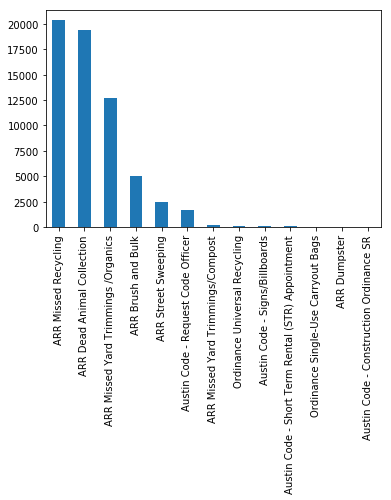

In [50]:
pd.value_counts(resource_recovery['complaint_description']).plot.bar()
plt.savefig("overviewresourcerecovery.png")
plt.show()

In [51]:
# resource_recovery['Incident Zip'].value_counts()

In [52]:
# pd.value_counts(resource_recovery['Incident Zip']).plot.bar()
# plt.show()

In [53]:
public_works = austin311_df[austin311_df['owning_department'].str.contains('Public Works')]
public_works.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type,month,year
12,AUSTIN,TRAVIS,78702,2016-03-09 14:46:45,Public Works,Pavement Failure,SBPAVEFA,3,2016
41,AUSTIN,TRAVIS,78704,2015-06-03 14:08:48,Public Works,Obstruction in ROW,OBSTMIDB,6,2015
42,AUSTIN,TRAVIS,78705,2016-10-05 11:53:42,Public Works,Curb/Gutter Repair,SBCURBGU,10,2016
48,AUSTIN,TRAVIS,78753,2014-02-06 15:53:16,Public Works,Pothole Repair,SBPOTREP,2,2014
57,AUSTIN,TRAVIS,78704,2016-04-25 16:20:11,Public Works,Tree Issue ROW/Emergency (PW),PRTRROWE,4,2016


In [54]:
# public_works['Type of Complaint'].value_counts()

In [55]:
public_works['complaint_description'].value_counts()

Pothole Repair                        9090
Debris in Street                      5986
Obstruction in ROW                    5387
Tree Issue ROW/Maintenance (PW)       4791
Tree Issue ROW/Emergency (PW)         4233
Sidewalk Repair                       3604
Pavement Failure                      3214
Alley & Unpaved Street Maintenance    1565
Mowing Medians                        1563
Curb/Gutter Repair                     725
Street Resurfacing Inquiry             691
School Zone - New/Review/Changes       349
Guardrail Repair                       301
Barricade Request                      213
Sidewalk/Curb Ramp/Route - NEW         183
Bridge Repair                          134
Roadway Spillage                       112
Bicycle Issues                          97
Road Sanding Request                    53
Guardrail - New                         34
Tree Issue ROW/Maintenance (PARD)       28
School Issues - Crossing Guards         26
Tree Issue ROW/Emergency (PARD)         24
Fence Repai

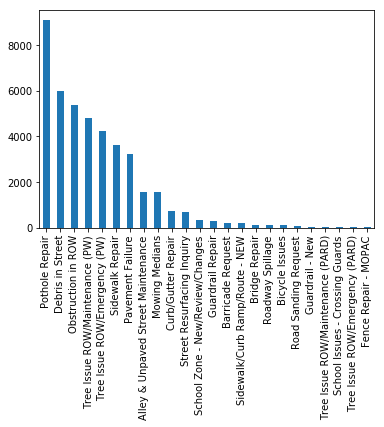

In [59]:
pd.value_counts(public_works['complaint_description']).plot.bar()
plt.savefig("overviewpublicworks.png")
plt.show()

In [57]:
# public_works['Incident Zip'].value_counts()

In [58]:
# pd.value_counts(public_works['Incident Zip']).plot.bar()
# plt.show()